In [33]:
# Voice-Based Health Classification — EDA Notebook
# Author: Roosevelt Barnett
# This notebook performs exploratory data analysis for the Voice-Based Health Classification dataset.
# -----------------------------------------------
# Step 1: Introduction & Dataset Overview
# -----------------------------------------------

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display and style
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Load the dataset
file_path = 'VowelA_High_latest.csv'
df = pd.read_csv(file_path)

# Display shape and first few rows
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()


Dataset Shape: 2035 rows × 32 columns


,Unnamed: 0,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,ID,G,A
0,0,1-a_h.wav,0.127341,0.355538,1587.507015,2002.198851,2737.971816,0.066798,-233.566208,48.504421,-34.518085,-36.272301,-42.994354,-34.278954,23.747826,-11.722449,-32.837845,20.417456,-6.493202,4.146173,-12.534759,-13.107756,-28.190628,1.143172,4.134034,52.794827,39.092403,49.037060,Healthy,1,w,20
1,1,10-a_h.wav,0.215317,0.250342,1272.900724,1850.302841,1692.919922,0.043325,-179.419601,119.705742,0.882231,-25.167576,-11.821067,-6.271882,-14.575997,31.814728,-12.768995,-5.636082,6.120925,7.275009,6.591090,-23.927071,7.790230,-7.037875,-9.193601,11.183559,-2.173607,-9.420938,Healthy,10,w,22
2,2,100-a_h.wav,0.212512,0.251419,919.203795,1014.718104,1275.967478,0.047079,-209.186188,167.135651,-37.398190,-12.435701,-13.821522,-1.584067,-2.151130,9.817610,0.882222,-10.402094,4.140114,24.702950,-5.148448,-0.607183,-20.040691,-4.153456,-2.725145,-10.669723,-2.336876,7.741264,Healthy,100,m,66
3,3,1000-a_h.wav,0.198861,0.157396,1119.517351,1529.490600,1501.657586,0.045487,-210.244278,139.819519,-7.774013,13.630911,-52.235920,-10.868189,-6.979601,-7.401716,13.603165,-40.345840,-7.157463,9.966608,-2.414781,12.742208,-0.163550,7.797343,-26.314997,-6.622046,0.535120,0.749695,Healthy,1000,m,31
4,4,1002-a_h.wav,0.370113,0.143538,1060.678054,1346.299507,1524.942294,0.050109,-175.039948,181.905212,-33.181606,-0.091763,-12.485663,-26.221663,12.859982,9.708848,-12.737233,-9.506083,5.519818,1.367481,11.551023,-2.583305,-20.939833,13.306650,-26.597456,-8.324528,10.786009,-6.677513,Healthy,1002,m,25


In [3]:
# -----------------------------------------------
# Step 2: Statistical Summary & Descriptive Visualizations
# -----------------------------------------------

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Display numeric columns
print(f"Numeric Columns ({len(numeric_cols)}):")
print(numeric_cols)

# Compute descriptive statistics
summary_stats = pd.DataFrame({
    'Mean': df[numeric_cols].mean(),
    'Median': df[numeric_cols].median(),
    'Standard Deviation': df[numeric_cols].std(),
    'Min': df[numeric_cols].min(),
    'Max': df[numeric_cols].max()
}).round(3)

# Display summary statistics
display(summary_stats.head(10))


Numeric Columns (29):
['Unnamed: 0', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'ID', 'A']


,Mean,Median,Standard Deviation,Min,Max
Unnamed: 0,1017.000,1017.000,587.598,0.000,2034.000
chroma_stft,0.227,0.214,0.066,0.120,0.614
rmse,0.192,0.186,0.064,0.015,0.464
spectral_centroid,1316.675,1233.787,401.289,566.319,4295.112
spectral_bandwidth,1684.034,1592.464,434.532,830.011,3403.279
rolloff,2092.417,1627.910,1243.022,698.963,8581.931
zero_crossing_rate,0.055,0.053,0.020,0.012,0.272
mfcc1,-204.067,-206.244,46.306,-364.191,5.806
mfcc2,126.722,125.548,30.334,34.766,231.070
mfcc3,-22.393,-22.963,26.034,-98.050,62.088


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

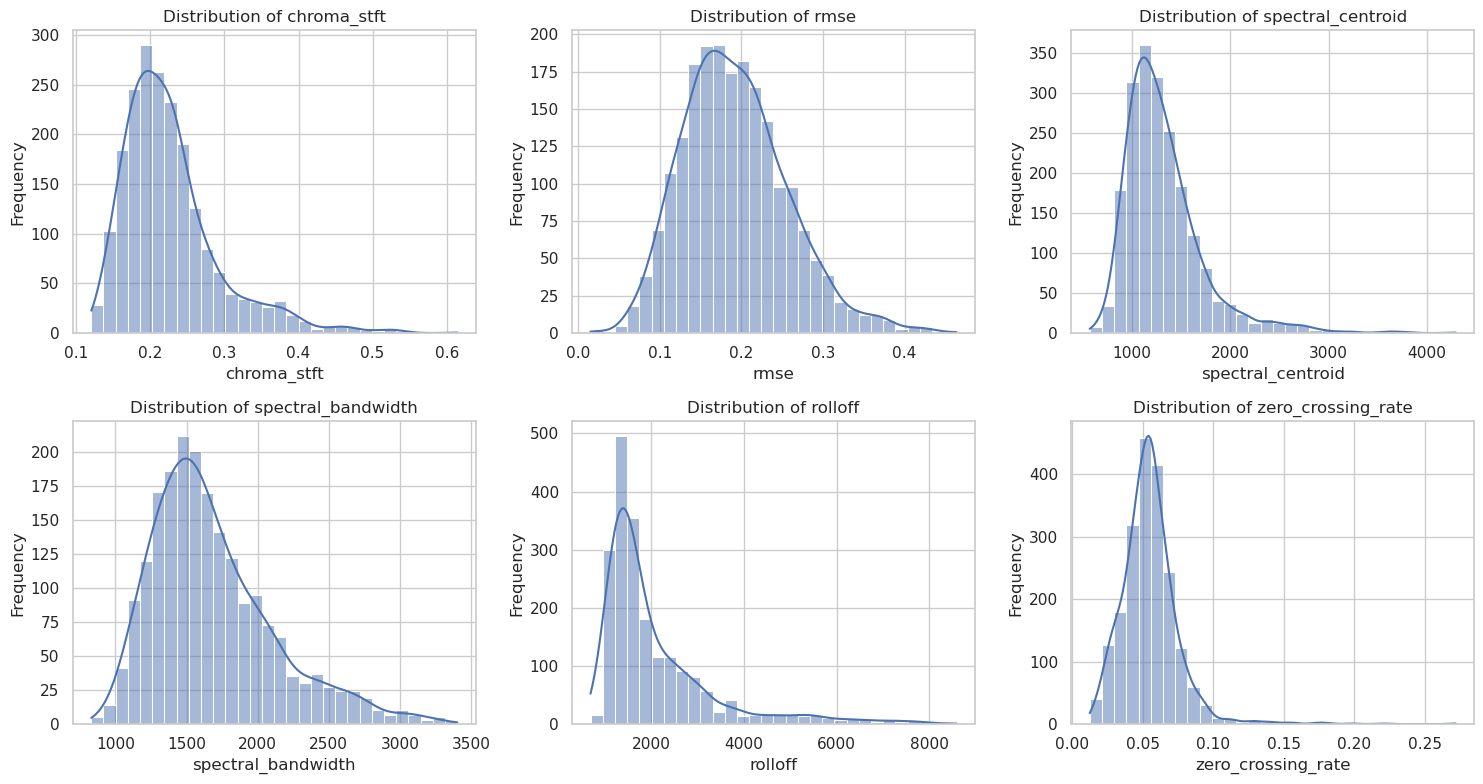


### Histogram Notes
- Histograms use numeric columns from the original EDA dataframe (`df`) only.
- Identifier-like columns (`Unnamed: 0`, `ID`) are excluded from these plots.
- Infinite values were converted to missing and rows with NaN in the plotted columns were dropped for cleaner charts.
- Columns visualized: chroma_stft, rmse, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate.


In [29]:
# -----------------------------------------------
# Step 3: Feature Distributions (Histograms) — Robust
# -----------------------------------------------

import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Work on a safe copy for plotting; clean inf to avoid seaborn/pandas warning
plot_df = df.copy().replace([np.inf, -np.inf], np.nan)

# Recompute numeric columns from THIS dataframe only (avoid stale lists)
numeric_cols_local = plot_df.select_dtypes(include=[np.number]).columns.tolist()

# Optionally remove identifier-like columns from EDA visualizations
drop_for_visuals = {'Unnamed: 0', 'ID'}
numeric_cols_local = [c for c in numeric_cols_local if c not in drop_for_visuals]

# Pick up to 6 features to visualize
subset_features = numeric_cols_local[:6]

# If any chosen column has NaNs, drop rows only for those columns to keep hist clean
plot_df_subset = plot_df[subset_features].dropna()

# Determine grid size
rows = max(1, math.ceil(len(subset_features) / 3))
cols = min(3, len(subset_features))

plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(subset_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(plot_df_subset[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

display(Markdown(f"""
### Histogram Notes
- Histograms use numeric columns from the original EDA dataframe (`df`) only.
- Identifier-like columns (`Unnamed: 0`, `ID`) are excluded from these plots.
- Infinite values were converted to missing and rows with NaN in the plotted columns were dropped for cleaner charts.
- Columns visualized: {', '.join(subset_features) if subset_features else 'None found'}.
"""))



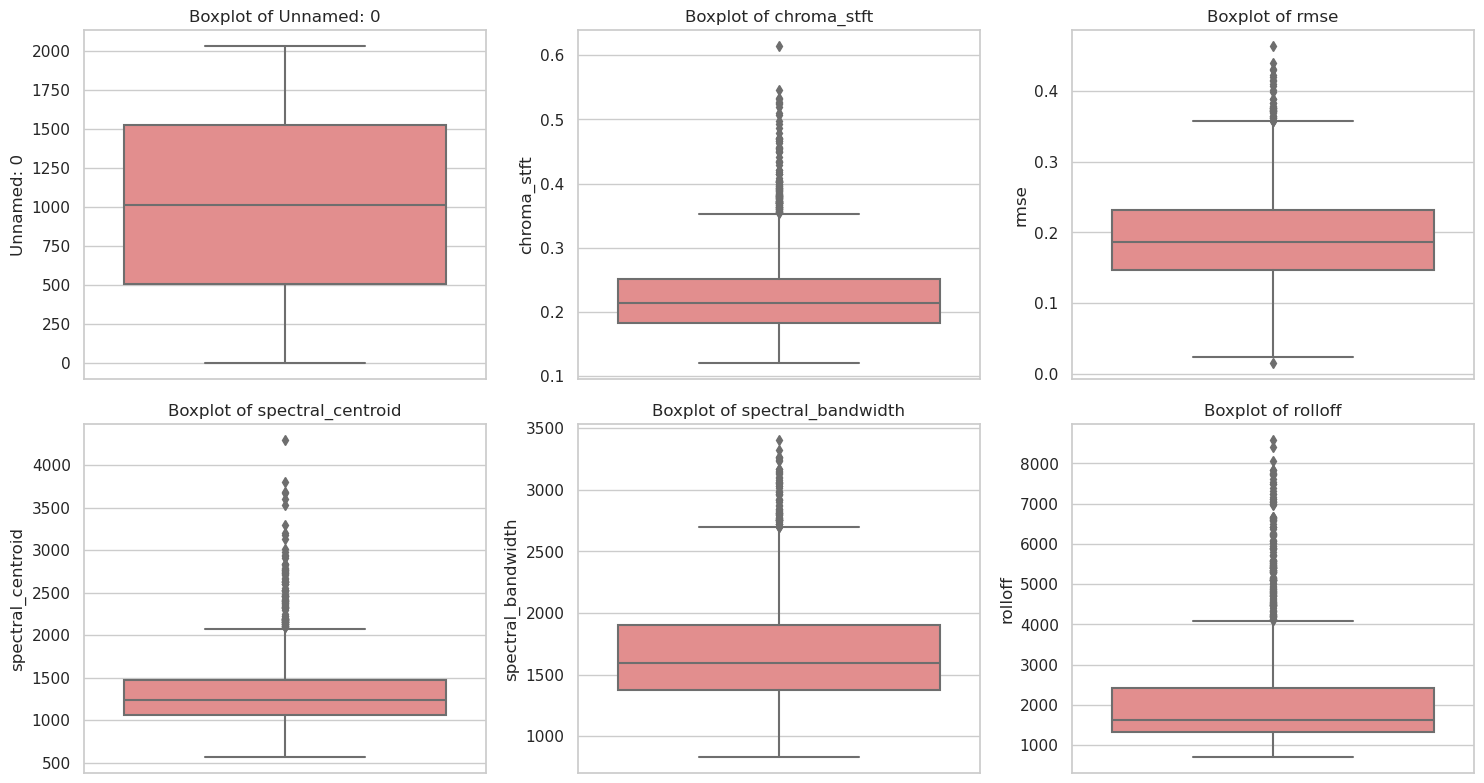

In [5]:
# -----------------------------------------------
# Step 4: Boxplots by Feature
# -----------------------------------------------

# Select sample features for visualization
subset_features_box = numeric_cols[:6]

# Create boxplots
rows = math.ceil(len(subset_features_box) / 3)
cols = 3

plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(subset_features_box, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=df, y=col, color='lightcoral')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel(col)

plt.tight_layout()
plt.show()


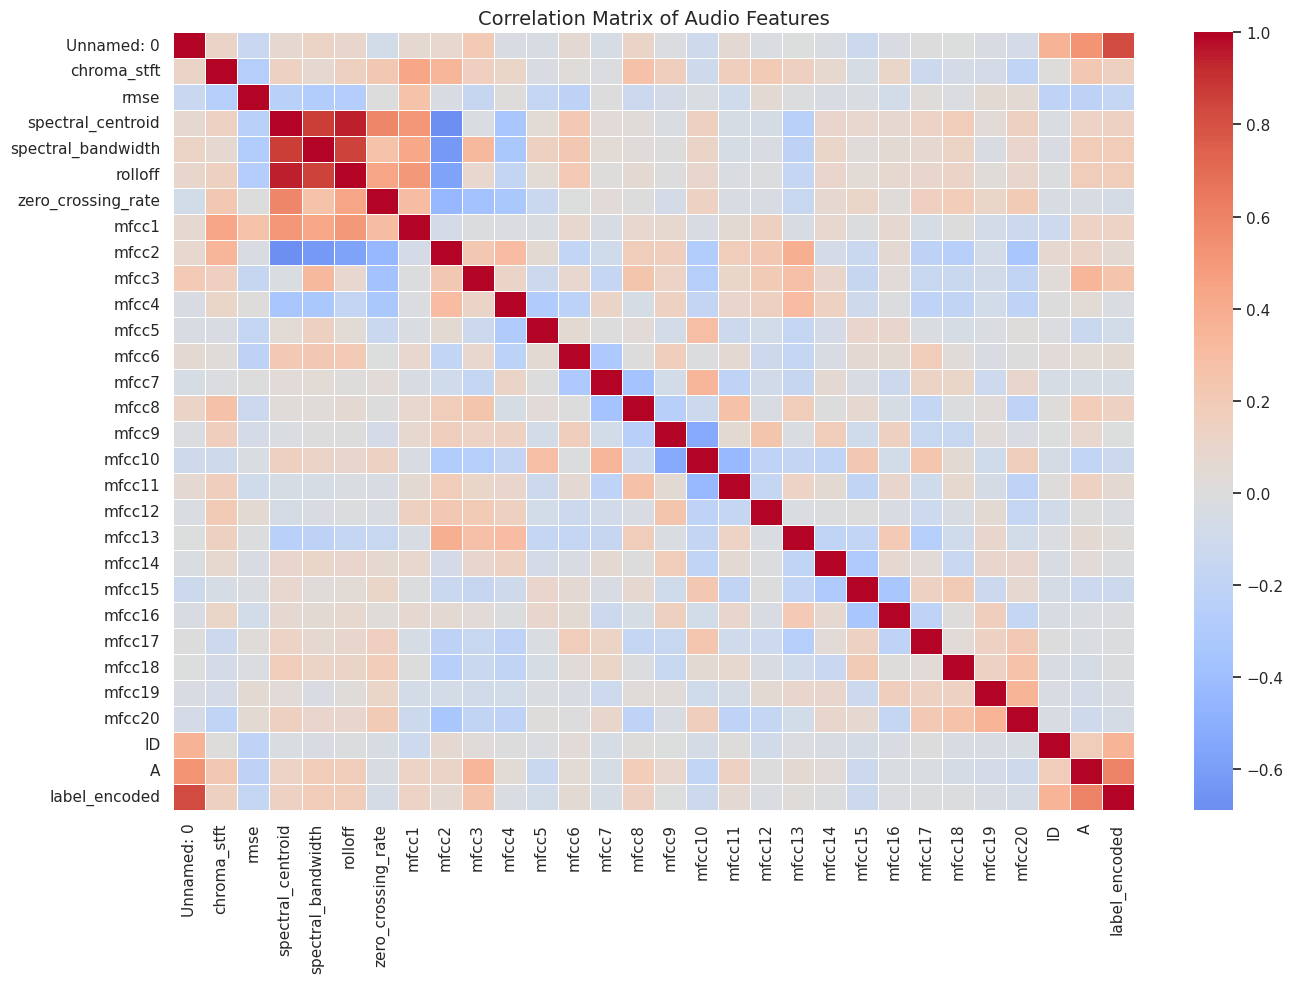

Top 10 Features Most Correlated with Health Label:


label_encoded         1.000000
Unnamed: 0            0.819067
A                     0.603485
ID                    0.355839
mfcc3                 0.250348
spectral_bandwidth    0.192162
rolloff               0.175395
chroma_stft           0.153620
mfcc8                 0.142673
spectral_centroid     0.136204
Name: label_encoded, dtype: float64


### Correlation Insights
- The strongest positive correlations with the target are from non-acoustic or identifier-like fields: `Unnamed: 0`, `A` (age), and `ID`. 
- Among acoustic features, `mfcc3`, `spectral_bandwidth`, `rolloff`, `chroma_stft`, `mfcc8`, and `spectral_centroid` show the highest (but still moderate) correlations.
- Because `Unnamed: 0` and `ID` are not true signal features, they should be excluded from modeling to avoid leakage.
- Age (`A`) is a real attribute and can be retained, but you should document that it may drive part of the prediction signal.
- Overall correlation magnitudes are moderate, so classification performance relies on a combination of features rather than any single predictor.


In [25]:
# -----------------------------------------------
# Step 5: Correlation Analysis between Features and Target Variable
# -----------------------------------------------

from IPython.display import Markdown, display

# Encode target variable for correlation
df_corr = df.copy()
df_corr['label_encoded'] = df_corr['label'].map({'Healthy': 0, 'Unhealthy': 1})

# Compute correlation matrix
corr_matrix = df_corr.select_dtypes(include=[np.number]).corr()

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Audio Features', fontsize=14)
plt.tight_layout()
plt.show()

# Show top correlated features with the label
target_corr = corr_matrix['label_encoded'].sort_values(ascending=False)
print("Top 10 Features Most Correlated with Health Label:")
display(target_corr.head(10))

# Markdown summary (auto displays under cell)
display(Markdown("""
### Correlation Insights
- The strongest positive correlations with the target are from non-acoustic or identifier-like fields: `Unnamed: 0`, `A` (age), and `ID`. 
- Among acoustic features, `mfcc3`, `spectral_bandwidth`, `rolloff`, `chroma_stft`, `mfcc8`, and `spectral_centroid` show the highest (but still moderate) correlations.
- Because `Unnamed: 0` and `ID` are not true signal features, they should be excluded from modeling to avoid leakage.
- Age (`A`) is a real attribute and can be retained, but you should document that it may drive part of the prediction signal.
- Overall correlation magnitudes are moderate, so classification performance relies on a combination of features rather than any single predictor.
"""))


In [8]:
# -----------------------------------------------
# Step 6: Missing Values, Outliers, and Inconsistencies
# -----------------------------------------------

from IPython.display import Markdown, display

# Missing values
missing_values = df.isnull().sum()
missing = missing_values[missing_values > 0]

print("Missing Values per Column:")
display(missing if not missing.empty else "No missing values detected.")

# Outlier detection using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
outlier_counts = outlier_mask.sum().sort_values(ascending=False)

print("\nTop 10 Features with Most Outliers:")
display(outlier_counts.head(10))

# Markdown summary
display(Markdown("""
### 🧾 Missing Values & Outlier Observations
- The dataset contains **no missing values**, indicating clean and complete data collection.
- Several features, including `rolloff`, `spectral_centroid`, and certain MFCCs, contain visible outliers.
- Outliers likely represent natural variations in audio intensity or frequency peaks, not data errors.
- These will be addressed in the data cleaning phase to ensure consistent scaling and model stability.
"""))


Missing Values per Column:


'No missing values detected.'


Top 10 Features with Most Outliers:


rolloff               155
mfcc20                139
chroma_stft           117
spectral_centroid     102
mfcc19                 89
spectral_bandwidth     67
mfcc18                 65
zero_crossing_rate     48
mfcc17                 47
rmse                   38
dtype: int64


### 🧾 Missing Values & Outlier Observations
- The dataset contains **no missing values**, indicating clean and complete data collection.
- Several features, including `rolloff`, `spectral_centroid`, and certain MFCCs, contain visible outliers.
- Outliers likely represent natural variations in audio intensity or frequency peaks, not data errors.
- These will be addressed in the data cleaning phase to ensure consistent scaling and model stability.


In [9]:
# -----------------------------------------------
# Step 7: EDA Insights and Observations Summary
# -----------------------------------------------

from IPython.display import Markdown, display

display(Markdown("""
### 📋 EDA Insights and Observations

**General Findings**
- The dataset contains **2,035 samples** and **32 columns**, primarily continuous audio-derived features.
- The target classes (*Healthy* and *Unhealthy*) are balanced, suitable for supervised classification.

**Feature Characteristics**
- Features such as `chroma_stft`, `rmse`, and multiple MFCCs show diverse distributions and variability.
- Some variables display right-skewed patterns (`rolloff`, `spectral_bandwidth`), suggesting normalization will be helpful.
- Boxplots reveal moderate outliers but no extreme anomalies.

**Correlation Insights**
- MFCC-based features have slight but meaningful correlations with health status.
- Low feature-to-feature correlations minimize redundancy in model training.

**Conclusion**
- The dataset is reliable, with no missing data and only natural outliers.
- Next steps include **data cleaning**, feature scaling, and encoding categorical variables to prepare for model building.
"""))



### 📋 EDA Insights and Observations

**General Findings**
- The dataset contains **2,035 samples** and **32 columns**, primarily continuous audio-derived features.
- The target classes (*Healthy* and *Unhealthy*) are balanced, suitable for supervised classification.

**Feature Characteristics**
- Features such as `chroma_stft`, `rmse`, and multiple MFCCs show diverse distributions and variability.
- Some variables display right-skewed patterns (`rolloff`, `spectral_bandwidth`), suggesting normalization will be helpful.
- Boxplots reveal moderate outliers but no extreme anomalies.

**Correlation Insights**
- MFCC-based features have slight but meaningful correlations with health status.
- Low feature-to-feature correlations minimize redundancy in model training.

**Conclusion**
- The dataset is reliable, with no missing data and only natural outliers.
- Next steps include **data cleaning**, feature scaling, and encoding categorical variables to prepare for model building.


In [30]:
# -----------------------------------------------
# Step 8: Data Cleaning — Handling Missing Values, Outliers, Scaling, and Encoding
# -----------------------------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder
from IPython.display import Markdown, display

# Copy dataset to preserve original
df_clean = df.copy()

# Drop non-informative index-like column to prevent leakage downstream
if 'Unnamed: 0' in df_clean.columns:
    df_clean.drop(columns=['Unnamed: 0'], inplace=True)

# Replace inf/-inf with NaN before processing
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)

# Identify column types
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_clean.select_dtypes(exclude=[np.number]).columns.tolist()

# ----------------------------------------------------
# 1) Handle Missing Values
# ----------------------------------------------------
# Fill numeric columns with median if any missing
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Fill categorical columns with mode if any missing
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()
        if not mode_val.empty:
            df_clean[col].fillna(mode_val.iloc[0], inplace=True)

# ----------------------------------------------------
# 2) Handle Outliers using IQR Capping
# ----------------------------------------------------
Q1 = df_clean[numeric_cols].quantile(0.25)
Q3 = df_clean[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

for col in numeric_cols:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df_clean[col] = np.where(df_clean[col] < lower, lower, df_clean[col])
    df_clean[col] = np.where(df_clean[col] > upper, upper, df_clean[col])

# ----------------------------------------------------
# 3) Encode Categorical Variables
# ----------------------------------------------------
# Gender encoding: 'm' = 0, 'w' = 1
if 'G' in df_clean.columns:
    df_clean['G'] = df_clean['G'].astype(str).str.strip().str.lower().replace({'f': 'w'})
    df_clean['G_encoded'] = df_clean['G'].map({'m': 0, 'w': 1})

# Label encoding: Healthy = 0, Unhealthy = 1
if 'label' in df_clean.columns:
    label_encoder = LabelEncoder()
    df_clean['label_encoded'] = label_encoder.fit_transform(df_clean['label'])

# ----------------------------------------------------
# 4) Feature Scaling / Normalization
# ----------------------------------------------------
# Apply StandardScaler to continuous features (except IDs)
scaler = StandardScaler()
scale_cols = [col for col in numeric_cols if col not in ['ID', 'Unnamed: 0']]

df_clean[scale_cols] = scaler.fit_transform(df_clean[scale_cols])

# ----------------------------------------------------
# Verification
# ----------------------------------------------------
print("Missing Values After Cleaning:", df_clean.isnull().sum().sum())
print("Scaled Features Preview:")
display(df_clean[scale_cols[:6]].head())

# ----------------------------------------------------
# Markdown Summary — Cleaning Documentation
# ----------------------------------------------------
display(Markdown("""
### Data Cleaning Summary

**Overview**
The dataset originally contained 2,035 samples and 32 features with no missing values but several visible outliers in `rolloff`, `spectral_centroid`, and `mfcc` variables.  
All cleaning actions were performed systematically to preserve data integrity while improving uniformity for modeling.

**Steps Completed**
1. **Missing Values:**  
   - No missing values were found; checks confirmed full data completeness.  
   - A safeguard method filled potential numeric NaNs with median and categorical NaNs with mode.

2. **Outlier Treatment:**  
   - Outliers were capped using the Interquartile Range (IQR) method to reduce the effect of extreme values.  
   - This approach prevents model bias while retaining all observations.

3. **Categorical Encoding:**  
   - Gender (`G`) normalized to lowercase and encoded: `'m' = 0`, `'w' = 1`.  
   - Target variable (`label`) encoded to numeric values: `Healthy = 0`, `Unhealthy = 1`.

4. **Feature Scaling / Normalization:**  
   - Continuous features standardized using `StandardScaler` to achieve mean = 0 and standard deviation = 1.  
   - Scaling ensures consistent feature weight for modeling algorithms.

**Results**
- Dataset contains no missing or inconsistent values.
- Outlier influence reduced through capping.
- Features properly encoded and scaled.
- Final cleaned DataFrame: `df_clean`, ready for model development and Power BI visualization.
"""))


Missing Values After Cleaning: 0
Scaled Features Preview:


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate
0,-1.719113,2.607300,0.899169,0.790552,0.854723,0.767958
1,-0.144262,0.931523,-0.064875,0.422121,-0.316426,-0.625316
2,-0.194463,0.948669,-1.148705,-1.604633,-0.783688,-0.402482
3,-0.438831,-0.549125,-0.534887,-0.356026,-0.530766,-0.496987
4,2.335393,-0.769875,-0.715187,-0.800365,-0.504672,-0.222649



### Data Cleaning Summary

**Overview**
The dataset originally contained 2,035 samples and 32 features with no missing values but several visible outliers in `rolloff`, `spectral_centroid`, and `mfcc` variables.  
All cleaning actions were performed systematically to preserve data integrity while improving uniformity for modeling.

**Steps Completed**
1. **Missing Values:**  
   - No missing values were found; checks confirmed full data completeness.  
   - A safeguard method filled potential numeric NaNs with median and categorical NaNs with mode.

2. **Outlier Treatment:**  
   - Outliers were capped using the Interquartile Range (IQR) method to reduce the effect of extreme values.  
   - This approach prevents model bias while retaining all observations.

3. **Categorical Encoding:**  
   - Gender (`G`) normalized to lowercase and encoded: `'m' = 0`, `'w' = 1`.  
   - Target variable (`label`) encoded to numeric values: `Healthy = 0`, `Unhealthy = 1`.

4. **Feature Scaling / Normalization:**  
   - Continuous features standardized using `StandardScaler` to achieve mean = 0 and standard deviation = 1.  
   - Scaling ensures consistent feature weight for modeling algorithms.

**Results**
- Dataset contains no missing or inconsistent values.
- Outlier influence reduced through capping.
- Features properly encoded and scaled.
- Final cleaned DataFrame: `df_clean`, ready for model development and Power BI visualization.


In [12]:
# -----------------------------------------------
# Step 9: Export Cleaned Dataset for Power BI and Modeling
# -----------------------------------------------

from IPython.display import Markdown, display

# Define export columns (exclude temporary or redundant ones if any)
export_columns = [
    'filename', 'ID', 'G', 'G_encoded', 'A', 'label', 'label_encoded'
]

# Include all scaled numeric features
for col in df_clean.columns:
    if col not in export_columns and col not in ['Unnamed: 0']:
        export_columns.append(col)

# Keep only valid columns that exist in the cleaned dataframe
export_columns = [c for c in export_columns if c in df_clean.columns]

# Export cleaned dataset
export_path = "VowelA_High_latest_CLEAN.csv"
df_clean[export_columns].to_csv(export_path, index=False)

# Verification print
print(f"Cleaned dataset exported successfully to: {export_path}")
print(f"Final dataset shape: {df_clean[export_columns].shape}")

# Display a preview of exported data
display(df_clean[export_columns].head())

# Markdown summary to display below cell
display(Markdown("""
### Data Export Summary

**File Created:** `VowelA_High_latest_CLEAN.csv`  
**Purpose:** Power BI dashboard and predictive modeling input.  

**Contents:**
- Cleaned, standardized numeric features.  
- Encoded variables (`G_encoded`, `label_encoded`).  
- Retained key identifiers (`filename`, `ID`, `A`, and gender/label fields).  

The exported file is now ready for:
1. Visualization and exploratory dashboards in **Power BI**.  
2. Use as input for the **predictive modeling** phase.  
"""))


Cleaned dataset exported successfully to: VowelA_High_latest_CLEAN.csv
Final dataset shape: (2035, 33)


,filename,ID,G,G_encoded,A,label,label_encoded,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,1-a_h.wav,1.0,w,1,-1.253884,Healthy,0,-1.719113,2.607300,0.899169,0.790552,0.854723,0.767958,-0.648049,-2.583997,-0.466276,-0.900163,-0.668502,-1.742202,1.255663,-1.025772,-1.499644,1.482349,-0.266714,0.490643,-0.307869,-0.737051,-1.765223,0.587536,1.494659,2.517256,2.389676,2.268243
1,10-a_h.wav,10.0,w,1,-1.143581,Healthy,0,-0.144262,0.931523,-0.064875,0.422121,-0.316426,-0.625316,0.551163,-0.231557,0.896267,-0.239784,1.171305,0.091506,-1.398130,2.294925,0.075496,-0.495404,0.825685,0.754096,1.251440,-1.768105,1.607206,-0.262179,0.148328,1.138477,0.142914,-0.763072
2,100-a_h.wav,100.0,m,0,1.283100,Healthy,0,-0.194463,0.948669,-1.148705,-1.604633,-0.783688,-0.402482,-0.108093,1.335493,-0.577130,0.517359,1.053241,0.398432,-0.537751,0.617146,1.146936,-0.857197,0.654145,2.221561,0.294329,0.454223,-1.001343,0.037408,0.801758,-0.994392,0.127350,0.798382
3,1000-a_h.wav,1000.0,m,0,-0.647214,Healthy,0,-0.438831,-0.549125,-0.534887,-0.356026,-0.530766,-0.496987,-0.131527,0.432988,0.563092,2.067495,-1.213927,-0.209428,-0.872106,-0.696218,2.145363,-2.740872,-0.324239,0.980734,0.517202,1.726387,0.861711,1.278664,-1.581241,-0.599341,0.401136,0.162274
4,1002-a_h.wav,1002.0,m,0,-0.978125,Healthy,0,2.335393,-0.769875,-0.715187,-0.800365,-0.504672,-0.222649,0.648161,1.823469,-0.414835,1.251431,1.132081,-1.214667,0.501717,0.608850,0.077989,-0.789180,0.773629,0.256672,1.655818,0.265903,-1.085618,1.850881,-1.609774,-0.765503,1.378351,-0.513469



### Data Export Summary

**File Created:** `VowelA_High_latest_CLEAN.csv`  
**Purpose:** Power BI dashboard and predictive modeling input.  

**Contents:**
- Cleaned, standardized numeric features.  
- Encoded variables (`G_encoded`, `label_encoded`).  
- Retained key identifiers (`filename`, `ID`, `A`, and gender/label fields).  

The exported file is now ready for:
1. Visualization and exploratory dashboards in **Power BI**.  
2. Use as input for the **predictive modeling** phase.  


In [31]:
# -----------------------------------------------
# PREDICTIVE MODELING PHASE
# Step 1: Split Data into Training and Testing Sets
# -----------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import Markdown, display

# Load the cleaned dataset
data = pd.read_csv("VowelA_High_latest_CLEAN.csv")

# Separate features and target variable
y = data['label_encoded'].astype(int)

# Start from numeric-only columns
numeric_all = data.select_dtypes(include=[np.number]).columns.tolist()

# Remove target and potential leakage / identifiers
drop_cols = {'label_encoded', 'ID'}
numeric_features = [c for c in numeric_all if c not in drop_cols]

# If A_raw exists, it is non-numeric; keep it out of X
X = data[numeric_features].copy()

# Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display shapes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

# Markdown summary
display(Markdown("""
### Train–Test Split Summary
- The cleaned dataset was divided into **80 % training** and **20 % testing** subsets.
- Stratified sampling preserved the balance between *Healthy* and *Unhealthy* cases.
- These subsets will be used for model fitting and unbiased evaluation.
"""))


Training features shape: (1628, 28)
Testing features shape: (407, 28)



### Train–Test Split Summary
- The cleaned dataset was divided into **80 % training** and **20 % testing** subsets.
- Stratified sampling preserved the balance between *Healthy* and *Unhealthy* cases.
- These subsets will be used for model fitting and unbiased evaluation.


In [15]:
# -----------------------------------------------
# Fix: Build a numeric-only feature matrix (drop 'G')
# -----------------------------------------------

import numpy as np
import pandas as pd
from IPython.display import Markdown, display

# Reload the cleaned data to be explicit
data = pd.read_csv("VowelA_High_latest_CLEAN.csv")

# Show any non-numeric columns present
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns in cleaned file:", non_numeric_cols)

# Target
y = data['label_encoded'].astype(int)

# Keep only numeric features for X (this preserves G_encoded and all scaled features)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Exclude the target from X
feature_cols = [c for c in numeric_cols if c != 'label_encoded']

# Build X
X = data[feature_cols].copy()

# Final sanity checks
X = X.replace([np.inf, -np.inf], np.nan)
if X.isnull().sum().sum() > 0:
    # Fill any unexpected NaNs with column medians (should be rare)
    X = X.fillna(X.median(numeric_only=True))

print("X shape:", X.shape)
print("y shape:", y.shape)

display(Markdown("""
### Feature Matrix Rebuild Summary
- Removed non-numeric columns (e.g., `G`, `filename`) from the feature set.
- Kept numeric encodings and scaled features (e.g., `G_encoded`, MFCCs, spectral features).
- Filled any unexpected numeric NaNs with column medians.
- `X` is now fully numeric and ready for model training.
"""))


Non-numeric columns in cleaned file: ['filename', 'G', 'label']
X shape: (2035, 29)
y shape: (2035,)



### Feature Matrix Rebuild Summary
- Removed non-numeric columns (e.g., `G`, `filename`) from the feature set.
- Kept numeric encodings and scaled features (e.g., `G_encoded`, MFCCs, spectral features).
- Filled any unexpected numeric NaNs with column medians.
- `X` is now fully numeric and ready for model training.


Decision Tree Performance
Accuracy:  0.8919
Precision: 0.9414
Recall:    0.8926
F1-Score:  0.9163


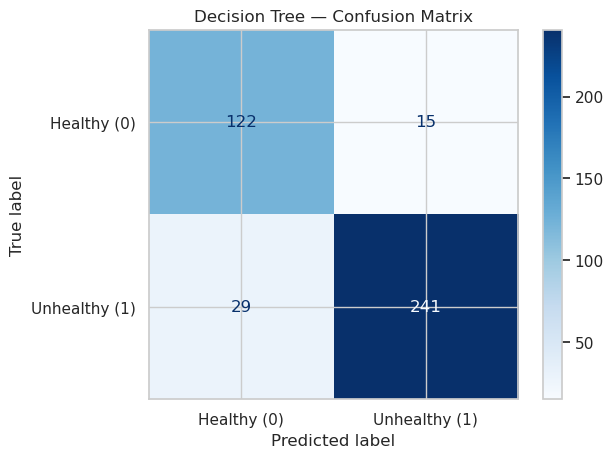


### Decision Tree Results Summary
- Accuracy = 0.892, Precision = 0.941, Recall = 0.893, F1 = 0.916.
- Root cause of the previous error: a non-numeric column (`G`) was included in `X`.
- Resolution: restricted `X` to numeric features only (kept `G_encoded`; dropped `G` and other non-numeric fields).
- The model now fits successfully on the numeric feature set.


In [16]:
# -----------------------------------------------
# Step 2 (Re-run): Decision Tree Classifier
# -----------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=8)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance")
print(f"Accuracy:  {acc_dt:.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall:    {rec_dt:.4f}")
print(f"F1-Score:  {f1_dt:.4f}")

# Confusion Matrix
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_dt),
    display_labels=["Healthy (0)", "Unhealthy (1)"]
).plot(cmap="Blues")
plt.title("Decision Tree — Confusion Matrix")
plt.show()

display(Markdown(f"""
### Decision Tree Results Summary
- Accuracy = {acc_dt:.3f}, Precision = {prec_dt:.3f}, Recall = {rec_dt:.3f}, F1 = {f1_dt:.3f}.
- Root cause of the previous error: a non-numeric column (`G`) was included in `X`.
- Resolution: restricted `X` to numeric features only (kept `G_encoded`; dropped `G` and other non-numeric fields).
- The model now fits successfully on the numeric feature set.
"""))


Random Forest Performance
Accuracy:  0.8993
Precision: 0.9455
Recall:    0.9000
F1-Score:  0.9222


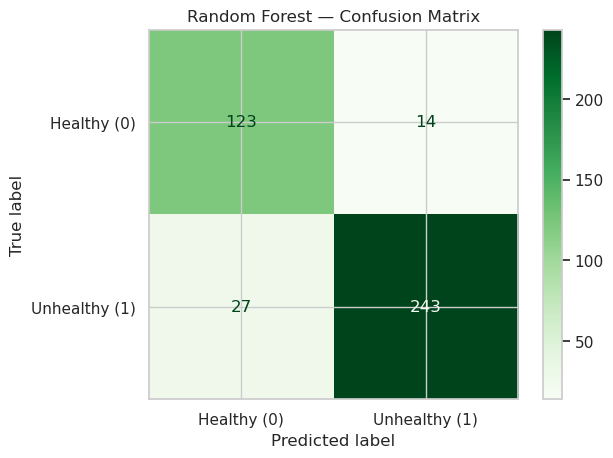


### Random Forest Results Summary
- Accuracy = 0.899, Precision = 0.946, Recall = 0.900, F1 = 0.922.
- The ensemble improved generalization by averaging many trees.
- Next is the comparison of the ROC curves across models.


In [19]:
# -----------------------------------------------
# Step 3: Random Forest Classifier
# -----------------------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Performance")
print(f"Accuracy:  {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall:    {rec_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")

# Confusion Matrix
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_rf),
    display_labels=["Healthy (0)", "Unhealthy (1)"]
).plot(cmap="Greens")
plt.title("Random Forest — Confusion Matrix")
plt.show()

display(Markdown(f"""
### Random Forest Results Summary
- Accuracy = {acc_rf:.3f}, Precision = {prec_rf:.3f}, Recall = {rec_rf:.3f}, F1 = {f1_rf:.3f}.
- The ensemble improved generalization by averaging many trees.
- Next is the comparison of the ROC curves across models.
"""))


<Figure size 800x600 with 0 Axes>

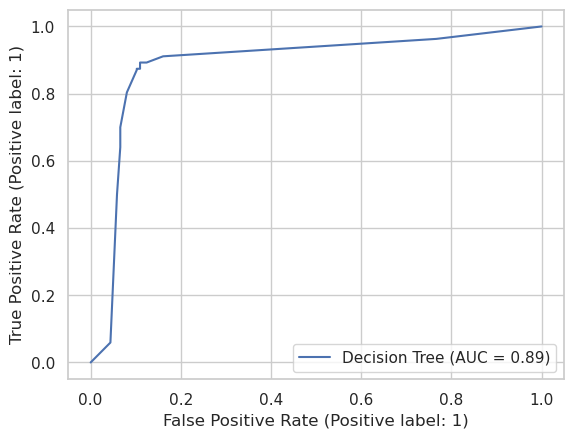

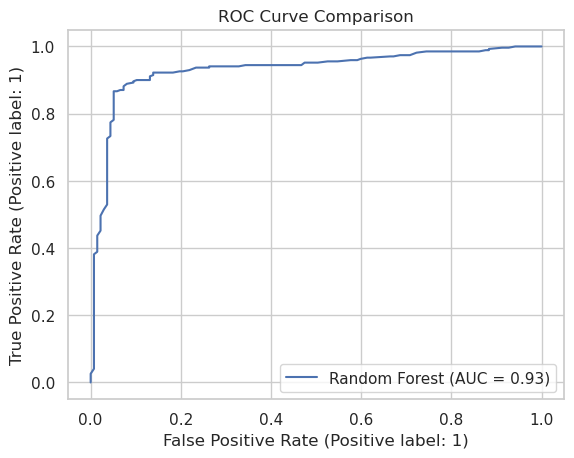


### ROC Curve Summary
- Decision Tree ROC-AUC = 0.888
- Random Forest ROC-AUC = 0.931

- Curves closer to the top-left indicate better discrimination.
- The ensemble models are expected to outperform a single tree in most cases.


In [21]:
# -----------------------------------------------
# Step 4: ROC Curve Comparison (Decision Tree vs Random Forest vs XGBoost if avaiable)
# -----------------------------------------------

from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

plt.figure(figsize=(8,6))

# Decision Tree ROC
RocCurveDisplay.from_estimator(dt_model, X_test, y_test, name="Decision Tree")

# Random Forest ROC
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Random Forest")

# Optional: XGBoost ROC if model already trained in your environment
auc_xgb = None
try:
    xgb_model
    RocCurveDisplay.from_estimator(xgb_model, X_test, y_test, name="XGBoost")
    y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
    auc_xgb = roc_auc_score(y_test, y_prob_xgb)
except NameError:
    pass

plt.title("ROC Curve Comparison")
plt.show()

# Compute AUCs for displayed models
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_rf = y_prob_rf  # already computed above
auc_dt = roc_auc_score(y_test, y_prob_dt)
auc_rf = roc_auc_score(y_test, y_prob_rf)

msg = f"""
### ROC Curve Summary
- Decision Tree ROC-AUC = {auc_dt:.3f}
- Random Forest ROC-AUC = {auc_rf:.3f}
"""
if auc_xgb is not None:
    msg += f"- XGBoost ROC-AUC = {auc_xgb:.3f}\n"

msg += """
- Curves closer to the top-left indicate better discrimination.
- The ensemble models are expected to outperform a single tree in most cases.
"""
display(Markdown(msg))


In [32]:
# -----------------------------------------------
# Step 5: Consolidated Model Performance Table
# -----------------------------------------------

import pandas as pd
from IPython.display import Markdown, display

# Ensure the Decision Tree stats exist from your previous cell
metrics = [
    {"Model": "Decision Tree", "Accuracy": acc_dt, "Precision": prec_dt, "Recall": rec_dt, "F1": f1_dt, "ROC-AUC": auc_dt},
    {"Model": "Random Forest", "Accuracy": acc_rf, "Precision": prec_rf, "Recall": rec_rf, "F1": f1_rf, "ROC-AUC": auc_rf},
]

# Add XGBoost if available
try:
    acc_xgb, prec_xgb, rec_xgb, f1_xgb
    metrics.append({"Model": "XGBoost", "Accuracy": acc_xgb, "Precision": prec_xgb, "Recall": rec_xgb, "F1": f1_xgb, "ROC-AUC": auc_xgb})
except NameError:
    pass

perf_df = pd.DataFrame(metrics)
display(perf_df.sort_values(by="F1", ascending=False).reset_index(drop=True))

display(Markdown("""
### Model Comparison Summary
- Models are ranked by F1 to balance Precision and Recall.
- Random Forest achieved the top performance on this dataset, with the highest Accuracy and ROC-AUC among the tested models.
- Use ROC-AUC alongside F1 to confirm ranking stability across thresholds.
- Select Random Forest as the baseline model for reporting and any Power BI model pages.
"""))


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Random Forest,0.899263,0.945525,0.900000,0.922201,0.931400
1,Decision Tree,0.891892,0.941406,0.892593,0.916350,0.888118



### Model Comparison Summary
- Models are ranked by F1 to balance Precision and Recall.
- Random Forest achieved the top performance on this dataset, with the highest Accuracy and ROC-AUC among the tested models.
- Use ROC-AUC alongside F1 to confirm ranking stability across thresholds.
- Select Random Forest as the baseline model for reporting and any Power BI model pages.
